
# Import Python libraries.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier


# Import Datasets

In [23]:
train_data = pd.read_csv("train_encoded_folds.csv").drop("ID",axis=1)
test_data = pd.read_csv("test_encoded.csv").drop("ID",axis=1)


In [24]:
train_data.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,CustomerAttrition,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,kfold
0,0,0,0,1,48,1,2,0,1,1,0,96.259802,4628.129119,1,0,0,1,0,0
1,1,0,1,0,45,1,2,0,0,0,1,18.876470,922.085998,0,1,0,0,0,6
2,1,1,1,0,59,1,2,1,0,1,0,106.016057,6205.891129,1,0,1,0,0,2
3,1,0,0,0,14,1,2,0,0,0,0,80.108839,1248.655391,0,0,0,1,0,5
4,0,0,1,1,25,1,2,0,1,0,1,51.529773,1285.321277,0,0,0,1,0,6


In [25]:
test_data.head(3)

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,1,0,0,0,8,1,2,0,0,0,1,21.299937,151.092519,0,0,1,0
1,0,0,0,0,26,1,1,0,1,0,1,56.609623,1553.276979,0,0,1,0
2,1,0,0,0,66,1,1,0,0,0,1,25.167690,1684.262416,0,1,0,0


# Convert datatype of selected fields.

# Drop the dependent variable from the train/test dataset. 

In [26]:
 ytrain = train_data[['CustomerAttrition','kfold']]
 xtrain = train_data.drop(['kfold','CustomerAttrition'],axis=1)

 concat = pd.concat([xtrain,test_data],axis = 0)
 mini = concat.min(axis=0)
 maxi = concat.max(axis=0)
 concat = (concat - mini)/maxi
 xtrain = concat[:len(xtrain)]
 test_data = concat[len(xtrain):]
 train_data = pd.concat([xtrain,ytrain],axis=1)

# Train your model

In [27]:
def train(model,xtrain,ytrain,xval,yval):
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtrain)
    acc = accuracy_score(ytrain, y_pred)
    f1  = f1_score(ytrain,y_pred)
    print(f'Train acc: {acc} f1: {f1}')
    y_pred = model.predict(xval)
    acc = accuracy_score(yval, y_pred)
    f1  = f1_score(yval,y_pred)
    print(f'Val acc: {acc} f1: {f1}')
    return model,y_pred,acc

def get_pred(model,xtest):
    return model.predict(xtest)

In [34]:
folds = 9

y_test_oof = []
y_pred_oof = []

all_preds = {}

for itr,fold in enumerate(range(folds)):
    X_train = train_data[train_data.kfold != fold].reset_index(drop=True).drop(['kfold'],axis=1)
    X_test  = train_data[train_data.kfold == fold].reset_index(drop=True).drop(['kfold'],axis=1)
    
    y_train = X_train["CustomerAttrition"]
    X_train = X_train.drop("CustomerAttrition",axis=1)
    
    y_test = X_test["CustomerAttrition"]
    X_test = X_test.drop("CustomerAttrition",axis=1)
    
    
    
    
    print(f"Train size {len(X_train)} | Val size {len(X_test)}")
    print()
    
    
    #model=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=9,max_features='log2',subsample=0.9,random_state=42)
    model=GradientBoostingClassifier()
    model,y_pred, acc = train(model,X_train,y_train,X_test,y_test)
    
    
    print(f"Doing Prediction for acc {acc}")
    all_preds[str(acc) + str(itr)] = get_pred(model,test_data)
    
    y_test_oof.extend(y_test)
    y_pred_oof.extend(y_pred)
   
    
    print()
    


Train size 5634 | Val size 703

Train acc: 0.8219737309194178 f1: 0.6146753745678065
Val acc: 0.7923186344238976 f1: 0.5602409638554217
Doing Prediction for acc 0.7923186344238976

Train size 5635 | Val size 702

Train acc: 0.8228926353149956 f1: 0.6245297215951843
Val acc: 0.7592592592592593 f1: 0.49552238805970145
Doing Prediction for acc 0.7592592592592593

Train size 5634 | Val size 703

Train acc: 0.8193113241036564 f1: 0.6149773071104387
Val acc: 0.8036984352773826 f1: 0.5766871165644172
Doing Prediction for acc 0.8036984352773826

Train size 5635 | Val size 702

Train acc: 0.8214729370008873 f1: 0.6186504927975739
Val acc: 0.8076923076923077 f1: 0.5794392523364486
Doing Prediction for acc 0.8076923076923077

Train size 5632 | Val size 705

Train acc: 0.8249289772727273 f1: 0.6236641221374046
Val acc: 0.7943262411347518 f1: 0.5454545454545455
Doing Prediction for acc 0.7943262411347518

Train size 5634 | Val size 703

Train acc: 0.8221512247071352 f1: 0.6235912847483095
Val acc: 

In [35]:
oof = accuracy_score(y_test_oof, y_pred_oof)
print('OOF acc: %f' % oof)

# sample_sub = pd.read_csv("Sample Submission.csv")
# base = np.zeros(len(test_data))
# for val in all_preds.values():
#     base += np.array(val)


# sample_sub['CustomerAttrition'] = 1*(base > (folds//2))

# sample_sub.replace({1:'Yes', 0:'No'}, inplace=True)
# sample_sub.to_csv("submission_gbc_0.795013.csv",index=False)

OOF acc: 0.794224


In [31]:
sample_sub

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No
...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,No
701,WS1T1FLY87G9A1UNKST4,No
702,0XG96FS1KXZSULPSGA1X,Yes
703,YR858QHNQMCDBCT9JRP6,No


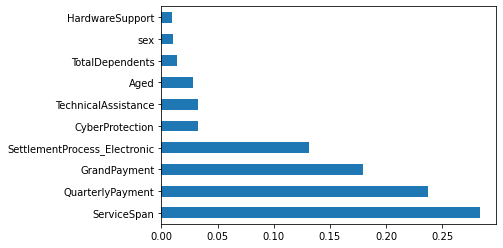

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()